## Redshift distributions and Sizes of samples

In [72]:
# Import stuff
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from scipy import interpolate 
from code.plot_utils import plot_pretty
from astropy.io import fits
#import skymapper as skm
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
%matplotlib inline
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


//anaconda/envs/python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### DES Y1 Gold Data

Import the DES Y1 Gold data.

In [73]:
Y1 = fits.open('DES_Y1A1_GOLD.fits')
print Y1[1].header.keys

<bound method Header.keys of XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   40 / length of dimension 1                          
NAXIS2  =              1104214 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   10 / number of table fields                         
TTYPE1  = 'mag_auto_g'                                                          
TFORM1  = 'E       '                                                            
TTYPE2  = 'mag_auto_r'                                                          
TFORM2  = 'E       '                                                            

In [74]:
z_mc = Y1[1].data['z_mc_bpz']
z_mean = Y1[1].data['mean_z_bpz']
z_median = Y1[1].data['median_z_bpz']
z_mode = Y1[1].data['mode_z_bpz']

i_auto = Y1[1].data['mag_auto_i']
g_auto = Y1[1].data['mag_auto_g']
r_auto = Y1[1].data['mag_auto_r']
z_auto = Y1[1].data['mag_auto_z']
spread_model_i = Y1[1].data['spread_model_i']
speraderr_model_i = Y1[1].data['spreaderr_model_i']

In [75]:
# Star - galaxy separation
star_gal = ((spread_model_i+(5.0/3.0)*speraderr_model_i)>0.007)

# Define the color cuts now
col_cuts_1 = ((g_auto - r_auto)>-1.0)&((g_auto - r_auto)<3.0)
col_cuts_2 = ((r_auto - i_auto)>-1.0)&((r_auto - i_auto)<2.5)
col_cuts_3 = ((i_auto - z_auto)>-1.0)&((i_auto - z_auto)<2.0)
col_cuts = col_cuts_1&col_cuts_2&col_cuts_3

# Extra_cuts 
ex_cut = ((z_mean<1.5)&(z_mean>0.0)&(z_mc<1.5))

In [76]:
z_mc_1 = z_mc[star_gal&col_cuts&ex_cut]
z_mean_1 = z_mean[star_gal&col_cuts&ex_cut]


i_auto_1 = i_auto[star_gal&col_cuts&ex_cut]
g_auto_1 = g_auto[star_gal&col_cuts&ex_cut]
r_auto_1 = r_auto[star_gal&col_cuts&ex_cut]
z_auto_1 = z_auto[star_gal&col_cuts&ex_cut] 

The total size of the sample (in millions) is:

In [77]:
print(32.0*len(z_mc_1)/1e6)

22.166944


### Bin the flux limited sample

In [78]:
bin_1_FL = z_mc_1[(z_mean_1>0.2)&(z_mean_1<0.35)]
bin_2_FL = z_mc_1[(z_mean_1>0.35)&(z_mean_1<0.50)]
bin_3_FL = z_mc_1[(z_mean_1>0.50)&(z_mean_1<0.65)]
bin_4_FL = z_mc_1[(z_mean_1>0.65)&(z_mean_1<0.80)]
bin_5_FL = z_mc_1[(z_mean_1>0.80)&(z_mean_1<0.95)]

Print the sizes now

In [79]:
print(32.0*np.size(bin_1_FL)/1.0e6)
print(32.0*np.size(bin_2_FL)/1.0e6)
print(32.0*np.size(bin_3_FL)/1.0e6)
print(32.0*np.size(bin_4_FL)/1.0e6)
print(32.0*np.size(bin_5_FL)/1.0e6)

3.493312
9.037696
3.59168
3.197408
1.430656


In [80]:
print(32.0*(len(bin_1_FL)+len(bin_2_FL)+len(bin_3_FL)+len(bin_4_FL)+len(bin_5_FL))/1.0e6)

20.750752


### BAO cuts

Color cuts for BAO sample selection:

\begin{equation}
(i - z) +2.0(r - i) > 1.7
\end{equation}

(and redshift cut:

\begin{equation}
i < 19.0 + 3z
\end{equation})

In [81]:
color_BAO_cut = (((i_auto_1 - z_auto_1)+2.0*(r_auto_1 - i_auto_1))>1.7)
mag_BAO_cut = (i_auto_1<(19.0+3.0*z_mean_1))

Apply these cuts now

In [82]:
z_mc_2 = z_mc_1[color_BAO_cut&mag_BAO_cut]
z_mean_2 = z_mean_1[color_BAO_cut&mag_BAO_cut] 

Bin them now

In [83]:
bin_1_BAO = z_mc_2[(z_mean_2>0.20)&(z_mean_2<0.35)]
bin_2_BAO = z_mc_2[(z_mean_2>0.35)&(z_mean_2<0.50)]
bin_3_BAO = z_mc_2[(z_mean_2>0.50)&(z_mean_2<0.65)]
bin_4_BAO = z_mc_2[(z_mean_2>0.65)&(z_mean_2<0.80)]
bin_5_BAO = z_mc_2[(z_mean_2>0.80)&(z_mean_2<0.95)]

In [84]:
print(32.0*np.size(bin_1_BAO)/1.0e6)
print(32.0*np.size(bin_2_BAO)/1.0e6)
print(32.0*np.size(bin_3_BAO)/1.0e6)
print(32.0*np.size(bin_4_BAO)/1.0e6)
print(32.0*np.size(bin_5_BAO)/1.0e6)

0.0
0.162432
1.699264
2.30048
1.1824


In [85]:
print(32.0*((len(bin_1_BAO)+len(bin_2_BAO)+len(bin_3_BAO)+len(bin_4_BAO)+len(bin_5_BAO))/1e6))

5.344576


### RedMaGiC data

In [86]:
RED = fits.open('DES_Y1A1_redMaGiC.fits')
print RED[1].header.keys

<bound method Header.keys of XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   48 / width of table in bytes                        
NAXIS2  =               653691 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    6 / number of fields in each row                   
TTYPE1  = 'ID      '           / label for field   1                            
TFORM1  = 'K       '           / data format of field: 8-byte INTEGER           
TTYPE2  = 'RA      '           / label for field   2                            
TFORM2  = 'D       '           / data format of field: 8-byte DOUBLE            

In [87]:
red_photo_z = RED[1].data['ZREDMAGIC'] 
red_error_z = RED[1].data['ZREDMAGIC_E'] 

In [88]:
from numpy.random import normal as gauss
true_z = gauss(red_photo_z,red_error_z)

Binning

In [89]:
bin_1_rm = true_z[(red_photo_z>0.20)&(red_photo_z<0.35)] 
bin_2_rm = true_z[(red_photo_z>0.35)&(red_photo_z<0.50)]
bin_3_rm = true_z[(red_photo_z>0.50)&(red_photo_z<0.65)]
bin_4_rm = true_z[(red_photo_z>0.65)&(red_photo_z<0.80)]
bin_5_rm = true_z[(red_photo_z>0.80)&(red_photo_z<0.95)]

Print the bin sizes and the total size

In [90]:
print(np.size(bin_1_rm)/1e3)
print(np.size(bin_2_rm)/1e3)
print(np.size(bin_3_rm)/1e3)
print(np.size(bin_4_rm)/1e3)
print(np.size(bin_5_rm)/1e3)

94.921
195.501
207.846
113.286
29.545


In [91]:
print((len(bin_1_rm)+len(bin_2_rm)+len(bin_3_rm)+len(bin_4_rm)+len(bin_5_rm))/1e6)

0.641099


In [92]:
import scipy.stats as stats 

density_1_FL = stats.gaussian_kde(bin_1_FL)
density_2_FL = stats.gaussian_kde(bin_2_FL)
density_3_FL = stats.gaussian_kde(bin_3_FL)
density_4_FL = stats.gaussian_kde(bin_4_FL)
density_5_FL = stats.gaussian_kde(bin_5_FL)

#density_1_BAO = stats.gaussian_kde(bin_1_BAO)
density_2_BAO = stats.gaussian_kde(bin_2_BAO)
density_3_BAO = stats.gaussian_kde(bin_3_BAO)
density_4_BAO = stats.gaussian_kde(bin_4_BAO)
density_5_BAO = stats.gaussian_kde(bin_5_BAO)

density_1_rm = stats.gaussian_kde(bin_1_rm)
density_2_rm = stats.gaussian_kde(bin_2_rm)
density_3_rm = stats.gaussian_kde(bin_3_rm)
density_4_rm = stats.gaussian_kde(bin_4_rm)
density_5_rm = stats.gaussian_kde(bin_5_rm)

y_like_1_FL, x_like_1_FL = np.histogram(bin_1_FL, bins=120, density=True)
y_like_2_FL, x_like_2_FL = np.histogram(bin_2_FL, bins=120, density=True)
y_like_3_FL, x_like_3_FL = np.histogram(bin_3_FL, bins=120, density=True)
y_like_4_FL, x_like_4_FL = np.histogram(bin_4_FL, bins=120, density=True)
y_like_5_FL, x_like_5_FL = np.histogram(bin_5_FL, bins=120, density=True)

y_like_1_BAO, x_like_1_BAO = np.histogram(bin_1_BAO, bins=120, density=True)
y_like_2_BAO, x_like_2_BAO = np.histogram(bin_2_BAO, bins=120, density=True)
y_like_3_BAO, x_like_3_BAO = np.histogram(bin_3_BAO, bins=120, density=True)
y_like_4_BAO, x_like_4_BAO = np.histogram(bin_4_BAO, bins=120, density=True)
y_like_5_BAO, x_like_5_BAO = np.histogram(bin_5_BAO, bins=120, density=True)

y_like_1_rm, x_like_1_rm = np.histogram(bin_1_rm, bins=120, density=True)
y_like_2_rm, x_like_2_rm = np.histogram(bin_2_rm, bins=120, density=True)
y_like_3_rm, x_like_3_rm = np.histogram(bin_3_rm, bins=120, density=True)
y_like_4_rm, x_like_4_rm = np.histogram(bin_4_rm, bins=120, density=True)
y_like_5_rm, x_like_5_rm = np.histogram(bin_5_rm, bins=120, density=True)

y = np.linspace(0.0,12.0,150)

In [93]:
from matplotlib.font_manager import FontProperties
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
plot_pretty()

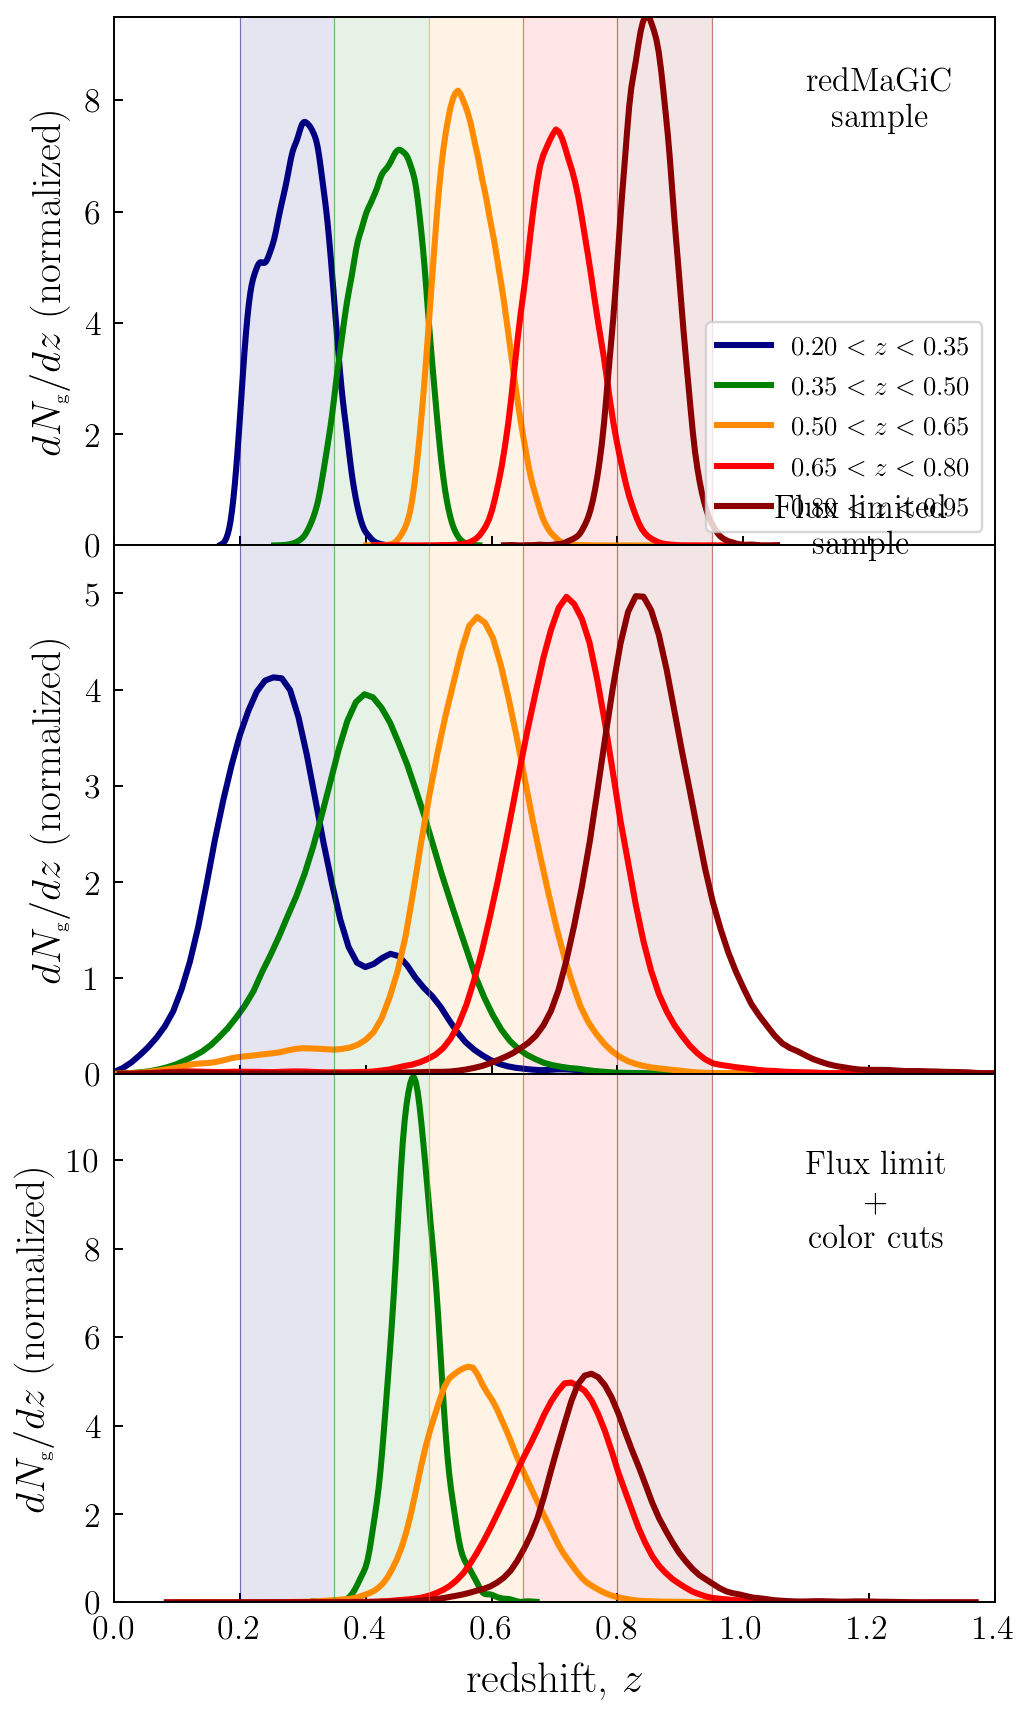

In [94]:
f, ax = plt.subplots(3, sharex=True, figsize = (6.5,12))

ax[0].plot(x_like_1_rm, density_1_rm(x_like_1_rm),  linewidth=2.5, color='navy',label='$0.20 <z < 0.35$' )
ax[0].plot(x_like_2_rm, density_2_rm(x_like_2_rm),  linewidth=2.5, color='green',label='$0.35< z< 0.50$' )
ax[0].plot(x_like_3_rm, density_3_rm(x_like_3_rm),  linewidth=2.5,  color='darkorange',label='$0.50<z <0.65$' )
ax[0].plot(x_like_4_rm, density_4_rm(x_like_4_rm),  linewidth=2.5,  color='red',label='$0.65<z<0.80$' )
ax[0].plot(x_like_5_rm, density_5_rm(x_like_5_rm),  linewidth=2.5,  color='darkred',label='$0.80<z<0.95$' )

ax[0].axvline(0.20, color='navy', linewidth=0.5, alpha=0.5);ax[0].axvline(0.35, color='green', linewidth=0.5, alpha=0.5)
ax[0].axvline(0.50, color='darkorange', linewidth=0.5, alpha=0.5);ax[0].axvline(0.65, color='red', linewidth=0.5, alpha=0.5)
ax[0].axvline(0.80, color='darkred', linewidth=0.5, alpha=0.5);ax[0].axvline(0.95, color='darkred', linewidth=0.5, alpha=0.5)

ax[0].fill_betweenx(y,0.20, 0.35, facecolor='navy', alpha=0.1 )
ax[0].fill_betweenx(y,0.35, 0.50, facecolor='green', alpha=0.1 )
ax[0].fill_betweenx(y,0.50, 0.65, facecolor='darkorange', alpha=0.1 )
ax[0].fill_betweenx(y,0.65, 0.80, facecolor='red', alpha=0.1 )
ax[0].fill_betweenx(y,0.80, 0.95, facecolor='darkred', alpha=0.1 )


ax[0].set_xlim(0.0,1.4)
ax[0].set_ylim(0.0,9.5)

ax[0].text(1.1, 7.5, 'redMaGiC \nsample', fontsize=13.5, multialignment='center')

ax[0].set_ylabel('$dN_{\mbox{\scriptsize{g}}}/dz$ (normalized)', fontsize=17.0)

ax[0].legend(frameon=True, loc='lower right', fontsize=11.0)

ax[0].tick_params(axis='both', labelsize=14)
#===================================================================================
#===================================================================================
ax[1].plot(x_like_1_FL, density_1_FL(x_like_1_FL), linewidth=2.5, color='navy',label='$0.20 < 0.35$' )
ax[1].plot(x_like_2_FL, density_2_FL(x_like_2_FL),  linewidth=2.5, color='green',label='$0.35 < 0.50$' )
ax[1].plot(x_like_3_FL, density_3_FL(x_like_3_FL),  linewidth=2.5,  color='darkorange',label='$0.50 < 0.65$' )
ax[1].plot(x_like_4_FL, density_4_FL(x_like_4_FL),  linewidth=2.5, color='red',label='$0.65 < 0.80$' )
ax[1].plot(x_like_4_FL, density_5_FL(x_like_5_FL),  linewidth=2.5, color='darkred',label='$0.80 < 0.95$' )

ax[1].axvline(0.20, color='navy', linewidth=0.5, alpha=0.5);ax[1].axvline(0.35, color='green', linewidth=0.5, alpha=0.5)
ax[1].axvline(0.50, color='darkorange', linewidth=0.5, alpha=0.5);ax[1].axvline(0.65, color='red', linewidth=0.5, alpha=0.5)
ax[1].axvline(0.80, color='darkred', linewidth=0.5, alpha=0.5);ax[1].axvline(0.95, color='darkred', linewidth=0.5, alpha=0.5)

ax[1].fill_betweenx(y,0.20, 0.35, facecolor='navy', alpha=0.1 )
ax[1].fill_betweenx(y,0.35, 0.50, facecolor='green', alpha=0.1 )
ax[1].fill_betweenx(y,0.50, 0.65, facecolor='darkorange', alpha=0.1 )
ax[1].fill_betweenx(y,0.65, 0.80, facecolor='red', alpha=0.1 )
ax[1].fill_betweenx(y,0.80, 0.95, facecolor='darkred', alpha=0.1 )


ax[1].set_xlim(0.0,1.4)
ax[1].set_ylim(0.0,5.5)


ax[1].set_xlabel('redshift, $z$', fontsize=18.0)
ax[1].set_ylabel('$dN_{\mbox{\scriptsize{g}}}/dz$ (normalized)', fontsize=17.0)
ax[1].text(1.05, 5.4, 'Flux limited \n sample', fontsize=13.5, multialignment='center')

ax[1].tick_params(axis='both', labelsize=14)



#===================================================================================
#===================================================================================
#ax[2].plot(x_like_1_BAO, density_1_BAO(x_like_1_BAO), linewidth=2.5, color='navy',label='$0.20 < 0.35$' )
ax[2].plot(x_like_2_BAO, density_2_BAO(x_like_2_BAO),  linewidth=2.5, color='green',label='$0.35 < 0.50$' )
ax[2].plot(x_like_3_BAO, density_3_BAO(x_like_3_BAO),  linewidth=2.5,  color='darkorange',label='$0.50 < 0.65$' )
ax[2].plot(x_like_4_BAO, density_4_BAO(x_like_4_BAO),  linewidth=2.5, color='red',label='$0.65 < 0.80$' )
ax[2].plot(x_like_4_BAO, density_5_BAO(x_like_5_BAO),  linewidth=2.5, color='darkred',label='$0.80 < 0.95$' )

ax[2].axvline(0.20, color='navy', linewidth=0.5, alpha=0.5);ax[2].axvline(0.35, color='green', linewidth=0.5, alpha=0.5)
ax[2].axvline(0.50, color='darkorange', linewidth=0.5, alpha=0.5);ax[2].axvline(0.65, color='red', linewidth=0.5, alpha=0.5)
ax[2].axvline(0.80, color='darkred', linewidth=0.5, alpha=0.5);ax[2].axvline(0.95, color='darkred', linewidth=0.5, alpha=0.5)

ax[2].fill_betweenx(y,0.20, 0.35, facecolor='navy', alpha=0.1 )
ax[2].fill_betweenx(y,0.35, 0.50, facecolor='green', alpha=0.1 )
ax[2].fill_betweenx(y,0.50, 0.65, facecolor='darkorange', alpha=0.1 )
ax[2].fill_betweenx(y,0.65, 0.80, facecolor='red', alpha=0.1 )
ax[2].fill_betweenx(y,0.80, 0.95, facecolor='darkred', alpha=0.1 )

ax[2].set_xlim(0.0,1.4)
ax[2].set_ylim(0.0,11.95)


ax[2].set_xlabel('redshift, $z$', fontsize=18.0)
ax[2].set_ylabel('$dN_{\mbox{\scriptsize{g}}}/dz$ (normalized)', fontsize=17.0)

ax[2].text(1.1, 8.0, 'Flux limit \n + \ncolor cuts', fontsize=13.5, multialignment='center')

ax[2].tick_params(axis='both', labelsize=14)

#=========================================================================

f.subplots_adjust(hspace=0)
plt.savefig('redshift_distributions.pdf')
plt.show()

### BAO sample

Now include the BAO sample, as it can be found in the data release (not using my cuts)

In [95]:
BAO = fits.open('DES_Y1A1_BAO_sample.fits')
print BAO[1].header.keys

<bound method Header.keys of XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                   80 / width of table in bytes                        
NAXIS2  =              1300200 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                   10 / number of columns                              
EXTNAME = 'Joined  '           / table name                                     
TTYPE1  = 'ra      '           / label for column 1                             
TFORM1  = 'D       '           / format for column 1                            
TTYPE2  = 'dec     '           / label for column 2                             

In [96]:
z_BAO = BAO[1].data['z']
z_mc_BAO = BAO[1].data['z_mc']
cuts = (z_mc_BAO>0.1)&(z_mc_BAO<1.4)

z_BAO = z_BAO[cuts]
z_mc_BAO = z_mc_BAO[cuts]

Binning

In [97]:
bin_1_BAO = z_mc_BAO[(z_BAO>0.20)&(z_BAO<0.35)] 
bin_2_BAO = z_mc_BAO[(z_BAO>0.35)&(z_BAO<0.50)]
bin_3_BAO = z_mc_BAO[(z_BAO>0.50)&(z_BAO<0.65)]
bin_4_BAO = z_mc_BAO[(z_BAO>0.65)&(z_BAO<0.80)]
bin_5_BAO = z_mc_BAO[(z_BAO>0.80)&(z_BAO<0.95)]

Print the bin sizes and the total size

In [98]:
print(np.size(bin_1_BAO)/1e6)
print(np.size(bin_2_BAO)/1e6)
print(np.size(bin_3_BAO)/1e6)
print(np.size(bin_4_BAO)/1e6)
print(np.size(bin_5_BAO)/1e6)

0.0
0.0
0.18447
0.535485
0.44968


In [99]:
print((len(bin_1_BAO)+len(bin_2_BAO)+len(bin_3_BAO)+len(bin_4_BAO)+len(bin_5_BAO))/1e6)

1.169635


In [100]:
#density_1_BAO = stats.gaussian_kde(bin_1_BAO)
#density_2_BAO = stats.gaussian_kde(bin_2_BAO)
density_3_BAO = stats.gaussian_kde(bin_3_BAO)
density_4_BAO = stats.gaussian_kde(bin_4_BAO)
density_5_BAO = stats.gaussian_kde(bin_5_BAO)

In [101]:
#y_like_1_BAO, x_like_1_BAO = np.histogram(bin_1_BAO, bins=120, density=True)
#y_like_2_BAO, x_like_2_BAO = np.histogram(bin_2_BAO, bins=120, density=True)
y_like_3_BAO, x_like_3_BAO = np.histogram(bin_3_BAO, bins=80, density=True)
y_like_4_BAO, x_like_4_BAO = np.histogram(bin_4_BAO, bins=80, density=True)
y_like_5_BAO, x_like_5_BAO = np.histogram(bin_5_BAO, bins=80, density=True)

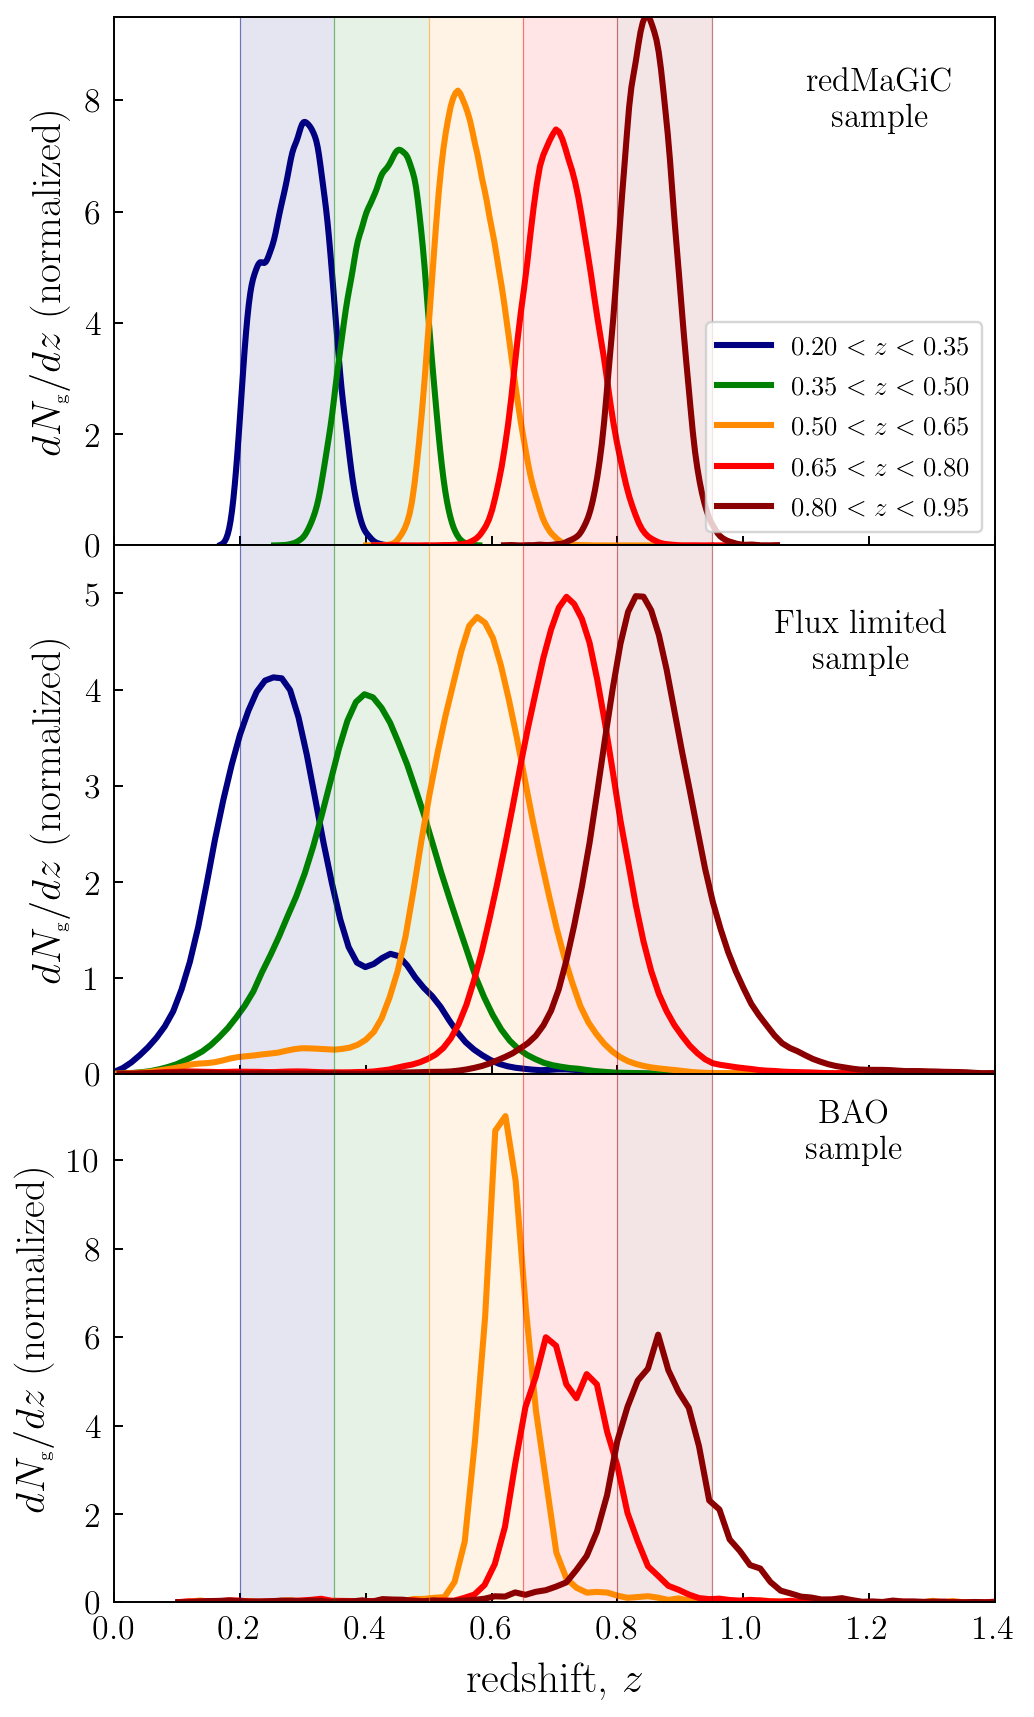

In [103]:
f, ax = plt.subplots(3, sharex=True, figsize = (6.5,12))

ax[0].plot(x_like_1_rm, density_1_rm(x_like_1_rm),  linewidth=2.5, color='navy',label='$0.20 <z < 0.35$' )
ax[0].plot(x_like_2_rm, density_2_rm(x_like_2_rm),  linewidth=2.5, color='green',label='$0.35< z< 0.50$' )
ax[0].plot(x_like_3_rm, density_3_rm(x_like_3_rm),  linewidth=2.5,  color='darkorange',label='$0.50<z <0.65$' )
ax[0].plot(x_like_4_rm, density_4_rm(x_like_4_rm),  linewidth=2.5,  color='red',label='$0.65<z<0.80$' )
ax[0].plot(x_like_5_rm, density_5_rm(x_like_5_rm),  linewidth=2.5,  color='darkred',label='$0.80<z<0.95$' )

ax[0].axvline(0.20, color='navy', linewidth=0.5, alpha=0.5);ax[0].axvline(0.35, color='green', linewidth=0.5, alpha=0.5)
ax[0].axvline(0.50, color='darkorange', linewidth=0.5, alpha=0.5);ax[0].axvline(0.65, color='red', linewidth=0.5, alpha=0.5)
ax[0].axvline(0.80, color='darkred', linewidth=0.5, alpha=0.5);ax[0].axvline(0.95, color='darkred', linewidth=0.5, alpha=0.5)

ax[0].fill_betweenx(y,0.20, 0.35, facecolor='navy', alpha=0.1 )
ax[0].fill_betweenx(y,0.35, 0.50, facecolor='green', alpha=0.1 )
ax[0].fill_betweenx(y,0.50, 0.65, facecolor='darkorange', alpha=0.1 )
ax[0].fill_betweenx(y,0.65, 0.80, facecolor='red', alpha=0.1 )
ax[0].fill_betweenx(y,0.80, 0.95, facecolor='darkred', alpha=0.1 )


ax[0].set_xlim(0.0,1.4)
ax[0].set_ylim(0.0,9.5)

ax[0].text(1.1, 7.5, 'redMaGiC \nsample', fontsize=13.5, multialignment='center')

ax[0].set_ylabel('$dN_{\mbox{\scriptsize{g}}}/dz$ (normalized)', fontsize=17.0)

ax[0].legend(frameon=True, loc='lower right', fontsize=11.0)

ax[0].tick_params(axis='both', labelsize=14)
#===================================================================================
#===================================================================================
ax[1].plot(x_like_1_FL, density_1_FL(x_like_1_FL), linewidth=2.5, color='navy',label='$0.20 < 0.35$' )
ax[1].plot(x_like_2_FL, density_2_FL(x_like_2_FL),  linewidth=2.5, color='green',label='$0.35 < 0.50$' )
ax[1].plot(x_like_3_FL, density_3_FL(x_like_3_FL),  linewidth=2.5,  color='darkorange',label='$0.50 < 0.65$' )
ax[1].plot(x_like_4_FL, density_4_FL(x_like_4_FL),  linewidth=2.5, color='red',label='$0.65 < 0.80$' )
ax[1].plot(x_like_4_FL, density_5_FL(x_like_5_FL),  linewidth=2.5, color='darkred',label='$0.80 < 0.95$' )

ax[1].axvline(0.20, color='navy', linewidth=0.5, alpha=0.5);ax[1].axvline(0.35, color='green', linewidth=0.5, alpha=0.5)
ax[1].axvline(0.50, color='darkorange', linewidth=0.5, alpha=0.5);ax[1].axvline(0.65, color='red', linewidth=0.5, alpha=0.5)
ax[1].axvline(0.80, color='darkred', linewidth=0.5, alpha=0.5);ax[1].axvline(0.95, color='darkred', linewidth=0.5, alpha=0.5)

ax[1].fill_betweenx(y,0.20, 0.35, facecolor='navy', alpha=0.1 )
ax[1].fill_betweenx(y,0.35, 0.50, facecolor='green', alpha=0.1 )
ax[1].fill_betweenx(y,0.50, 0.65, facecolor='darkorange', alpha=0.1 )
ax[1].fill_betweenx(y,0.65, 0.80, facecolor='red', alpha=0.1 )
ax[1].fill_betweenx(y,0.80, 0.95, facecolor='darkred', alpha=0.1 )


ax[1].set_xlim(0.0,1.4)
ax[1].set_ylim(0.0,5.5)


ax[1].set_xlabel('redshift, $z$', fontsize=18.0)
ax[1].set_ylabel('$dN_{\mbox{\scriptsize{g}}}/dz$ (normalized)', fontsize=17.0)
ax[1].text(1.05, 4.2, 'Flux limited \n sample', fontsize=13.5, multialignment='center')

ax[1].tick_params(axis='both', labelsize=14)



#===================================================================================
#===================================================================================
#ax[2].plot(x_like_1_BAO, density_1_BAO(x_like_1_BAO), linewidth=2.5, color='navy',label='$0.20 < 0.35$' )
#ax[2].plot(x_like_2_BAO, density_2_BAO(x_like_2_BAO),  linewidth=2.5, color='green',label='$0.35 < 0.50$' )
ax[2].plot(x_like_3_BAO, density_3_BAO(x_like_3_BAO),  linewidth=2.5,  color='darkorange',label='$0.50 < 0.65$' )
ax[2].plot(x_like_4_BAO, density_4_BAO(x_like_4_BAO),  linewidth=2.5, color='red',label='$0.65 < 0.80$' )
ax[2].plot(x_like_4_BAO, density_5_BAO(x_like_5_BAO),  linewidth=2.5, color='darkred',label='$0.80 < 0.95$' )

ax[2].axvline(0.20, color='navy', linewidth=0.5, alpha=0.5);ax[2].axvline(0.35, color='green', linewidth=0.5, alpha=0.5)
ax[2].axvline(0.50, color='darkorange', linewidth=0.5, alpha=0.5);ax[2].axvline(0.65, color='red', linewidth=0.5, alpha=0.5)
ax[2].axvline(0.80, color='darkred', linewidth=0.5, alpha=0.5);ax[2].axvline(0.95, color='darkred', linewidth=0.5, alpha=0.5)

ax[2].fill_betweenx(y,0.20, 0.35, facecolor='navy', alpha=0.1 )
ax[2].fill_betweenx(y,0.35, 0.50, facecolor='green', alpha=0.1 )
ax[2].fill_betweenx(y,0.50, 0.65, facecolor='darkorange', alpha=0.1 )
ax[2].fill_betweenx(y,0.65, 0.80, facecolor='red', alpha=0.1 )
ax[2].fill_betweenx(y,0.80, 0.95, facecolor='darkred', alpha=0.1 )

ax[2].set_xlim(0.0,1.4)
ax[2].set_ylim(0.0,11.95)


ax[2].set_xlabel('redshift, $z$', fontsize=18.0)
ax[2].set_ylabel('$dN_{\mbox{\scriptsize{g}}}/dz$ (normalized)', fontsize=17.0)

ax[2].text(1.1, 10, 'BAO \n sample', fontsize=13.5, multialignment='center')

ax[2].tick_params(axis='both', labelsize=14)

#=========================================================================

f.subplots_adjust(hspace=0)
plt.savefig('redshift_distributions.pdf')
plt.show()